In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys

import mygabasic as ga
 
%aimport mygabasic

HOlA MYGABASIC


# Coevolution

In [46]:
class SmNaiveAgent:
    """Simple clase de ejemplo"""
   
    def __init__(self, code, index):
        self.code = np.copy(code)
        self.state = 0
        self.stateOutput = 0
        self.cost = 0
        self.stateOutput = code[int(self.state)]
        self.index = index
        
    def play(self, oponetOutput):
        # Update cost
        # based on prisoner's dilemma cost matrix
        if self.stateOutput == 0 and oponetOutput == 0:
            self.cost = self.cost + 2
        if self.stateOutput == 0 and oponetOutput == 1:
            self.cost = self.cost + 7
        if self.stateOutput == 1 and oponetOutput == 0:
            self.cost = self.cost + 1
        if self.stateOutput == 1 and oponetOutput == 1:
            self.cost = self.cost + 4
            
        # print(self.cost)
        # Workout next state
        intState = int(self.state)   
        nextStatePairCodes = self.code[((intState + 1)*4) : (((intState + 1)*4) + 4)]
        # print(nextStatePairCodes)
        nextState = nextStatePairCodes[int(oponetOutput)*2:(int(oponetOutput)*2 + 2)]
        # print(nextState)
        self.state = nextState.dot(2**np.arange(nextState.size)[::-1])
        # print(self.state)
        # Workout nex stateOutput
        self.stateOutput = self.code[int(self.state)]
        # print(self.stateOutput)
               
    def output(self):
        return self.stateOutput;
    
    def currentstate(self):
        return self.state
    
    def getcode(self):
        return np.copy(self.code);
    
    def getindex(self):
        return self.index
    
    def getCost(self):
        # divided by the population size
        return self.cost/16

In [47]:
Pop = ga.pgenerator(N=16,d =20)
print(Pop[0])

agent = SmNaiveAgent(Pop[0], 0)



[1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1]


In [48]:
print(agent.output())
print(agent.currentstate())
print(agent.getcode())

1
0
[1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1]


In [49]:
agent.play(1)

In [50]:
agent.play(1)

In [51]:
agent.play(0)

In [52]:
N = 8
d = 20
PopA = ga.pgenerator(N=N,d=d)
PopB = ga.pgenerator(N=N,d=d)

agentSetA = []
agentSetB = []

for i in range(N):
    agentSetA.append(SmNaiveAgent(PopA[i],i))
    
for i in range(N):
    agentSetB.append(SmNaiveAgent(PopB[i],i))

# Play

In [53]:
"""
def play(N,agentSetA,agentSetB):
    for i in range(N):
        for j in range(N):
            outA = agentSetA[i].output()
            outB = agentSetB[j].output()
            agentSetA[i].play(outB)
            agentSetB[j].play(outA)
            
    return agentSetA,
"""


def play(N,agentSetA,agentSetB):
    for i in range(16):
        for i in range(N):
            outA = agentSetA[i].output()
            outB = agentSetB[i].output()
            agentSetA[i].play(outB)
            agentSetB[i].play(outA)
            


def playSingle(N,agentSetA,agentSetB):
    for i in range(N):
        outA = agentSetA[i].output()
        outB = agentSetB[i].output()
        agentSetA[i].play(outB)
        agentSetB[i].play(outA)
            
    #return agentSetA,agentSetB

 Iteration 69

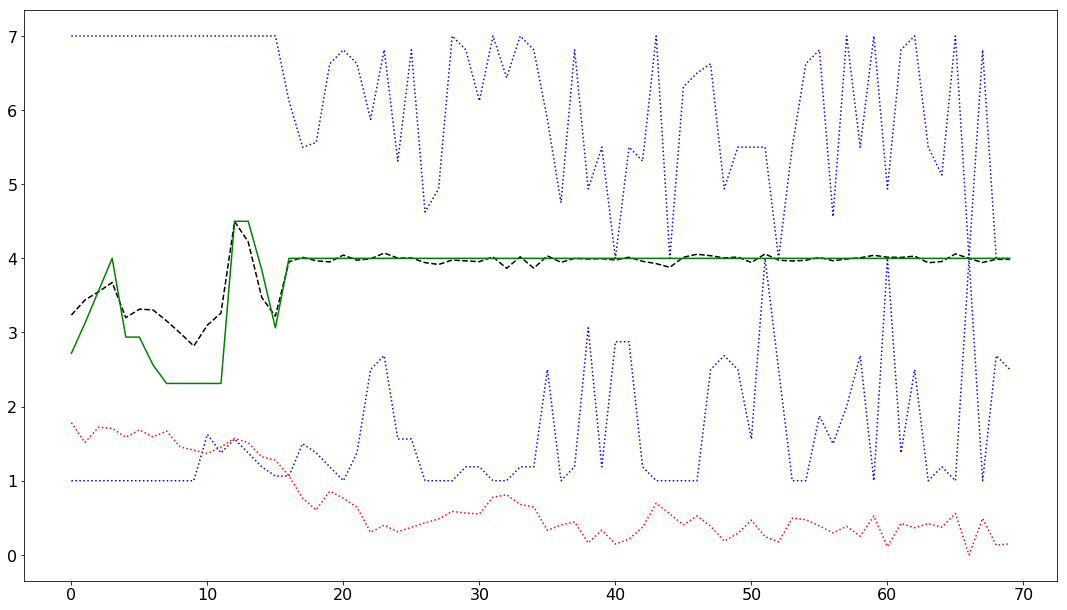

[1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1]
[1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


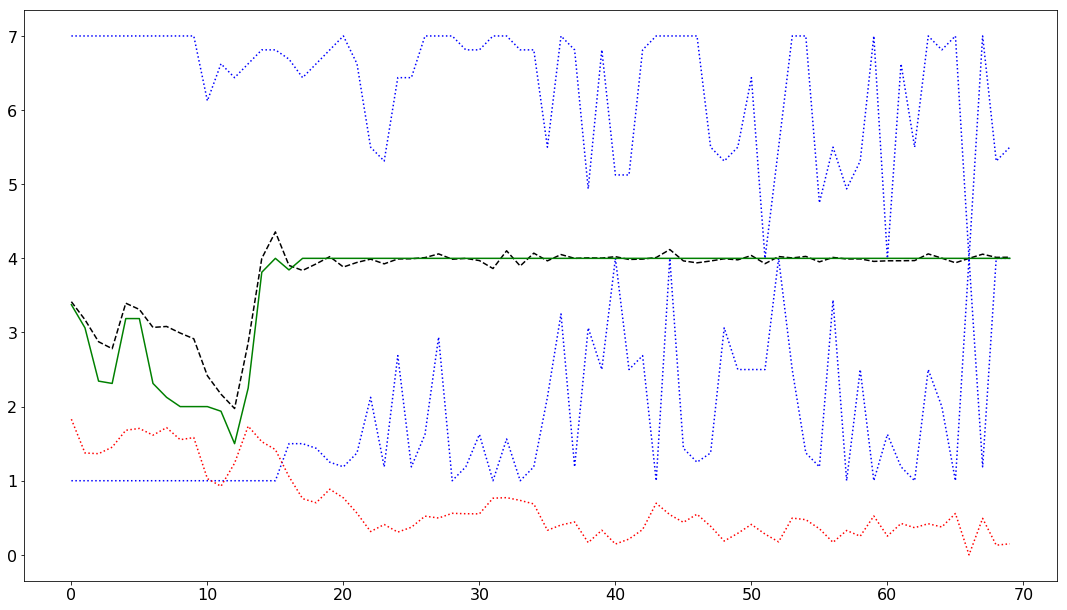

[1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0]
[1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1]


In [55]:
# Generate population
N = 100
d = 20

codeLen = 32
genQty = 3
iterations = 70
matingPercent = 0.8
mutaPercent = 1/d
# Initial population
PopA = ga.pgenerator(N=N,d=d)
PopB = ga.pgenerator(N=N,d=d)
# Evolving output matrix
OUT_MatrixA = np.zeros((5, iterations))
OUT_MatrixB = np.zeros((5, iterations))
Iterations = []

for j in range(0, iterations):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    Iterations.append(j)
    
    agentSetA = []
    agentSetB = []

    for i in range(N):
        agentSetA.append(SmNaiveAgent(PopA[i],i))

    for i in range(N):
        agentSetB.append(SmNaiveAgent(PopB[i],i))

    
    play(N,agentSetA,agentSetB)
    # workout fitnees after play phase
    # print('setA')
    fitListA = []
    for i in range(N):
        fitListA.append(agentSetA[i].getCost())
        # print(agentSetA[i].getCost())
    
    OUT_MatrixA[0][j] = np.mean(fitListA)
    OUT_MatrixA[1][j] = np.median(fitListA)
    OUT_MatrixA[2][j] = np.max(fitListA)
    OUT_MatrixA[3][j] = np.min(fitListA)
    OUT_MatrixA[4][j] = np.std(fitListA)


    
    # print('setB')
    fitListB = []
    for i in range(N):
        fitListB.append(agentSetB[i].getCost())
        # print(agentSetB[i].getCost())
        
    OUT_MatrixB[0][j] = np.mean(fitListB)
    OUT_MatrixB[1][j] = np.median(fitListB)
    OUT_MatrixB[2][j] = np.max(fitListB)
    OUT_MatrixB[3][j] = np.min(fitListB)
    OUT_MatrixB[4][j] = np.std(fitListB)


    pselectA = ga.tournamentSelection(PopA, fitListA, int(N/2))
    pselectB = ga.tournamentSelection(PopB, fitListB, int(N/2))

    childrenA = ga.childenGen(pselectA, matingPercent = matingPercent, mutaPercent = mutaPercent)
    childrenB = ga.childenGen(pselectB, matingPercent = matingPercent, mutaPercent = mutaPercent)

    # Double Population
    PopA = np.concatenate((PopA,childrenA), axis=0)
    PopB = np.concatenate((PopB,childrenB), axis=0)

    agentSetAx = []
    agentSetBx = []

    for i in range(N*2):
        agentSetAx.append(SmNaiveAgent(PopA[i],i))

    for i in range(N*2):
        agentSetBx.append(SmNaiveAgent(PopB[i],i))


    play(N*2,agentSetAx,agentSetBx)


    # print('setAx')
    fitListAx = []
    for i in range(N*2):
        fitListAx.append(agentSetAx[i].getCost())
        # print(agentSetAx[i].getCost())

    # print('setBx')
    fitListBx = []
    for i in range(N*2):
        fitListBx.append(agentSetBx[i].getCost())
        # print(agentSetBx[i].getCost())


    fitListAx_SortedIdxs = np.argsort(fitListAx)
    tmpPopA = np.asarray(PopA)[fitListAx_SortedIdxs]
    fitListBx_SortedIdxs = np.argsort(fitListBx)
    tmpPopB = np.asarray(PopB)[fitListBx_SortedIdxs]

    PopA = np.copy(tmpPopA[:N,:])
    PopB = np.copy(tmpPopB[:N,:])



plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_MatrixA[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixA[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixA[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixA[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixA[4]),
         'r:')
plt.show()
print(PopA[0])
print(PopA[N-1])
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_MatrixB[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixB[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixB[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixB[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_MatrixB[4]),
         'r:')
plt.show()
print(PopB[0])
print(PopB[N-1])